<a href="https://colab.research.google.com/github/Vkjadhav/Movie-Recommendation/blob/main/Movie__Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('/ratings.csv', names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [27]:
movie_titles = pd.read_csv("/movie_titles.csv")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [28]:
df = pd.merge(df,movie_titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,1,16,4.0,1217897793,Casino (1995)
1,9,16,4.0,842686699,Casino (1995)
2,12,16,1.5,1144396284,Casino (1995)
3,24,16,4.0,963468757,Casino (1995)
4,29,16,3.0,836820223,Casino (1995)


In [29]:
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [30]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Rome, Open City (a.k.a. Open City) (Roma, citt?perta) (1945)     5.0
Saddest Music in the World, The (2003)                           5.0
Barenaked in America (1999)                                      5.0
Traviata, La (1982)                                              5.0
Night of the Shooting Stars (Notte di San Lorenzo, La) (1982)    5.0
Name: rating, dtype: float64

In [31]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

In [32]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


In [33]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


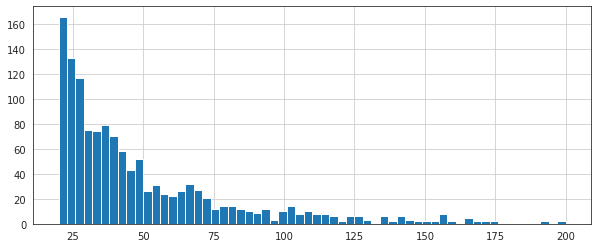

In [34]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=60, range=(20,200))

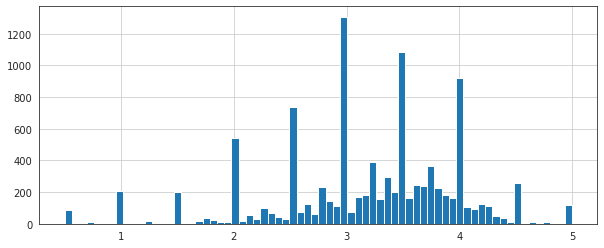

In [35]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

In [36]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,Zulu (1964),[REC] (2007),[REC]? (2009),[REC]? 3 Genesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),iThree Amigos! (1986),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
user_ratings = moviemat['Pulp Fiction (1994)']
user_ratings.head()

user_id
1    4.0
2    NaN
3    5.0
4    4.0
5    NaN
Name: Pulp Fiction (1994), dtype: float64

In [38]:
similar_to_typed_movie = moviemat.corrwith(user_ratings)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/n

In [39]:
corr_to_movie = pd.DataFrame(similar_to_typed_movie, columns=['Correlation'])
corr_to_movie.dropna(inplace=True)
corr_to_movie.head()


,Correlation
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",-0.475997
(500) Days of Summer (2009),0.076894
*batteries not included (1987),0.881917
...And Justice for All (1979),0.961524


In [40]:
corr_to_movie.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
"Quiet, The (2005)",1.0
Absence of Malice (1981),1.0
Scooby-Doo 2: Monsters Unleashed (2004),1.0
After.Life (2009),1.0
Nightwatch (Nattevagten) (1994),1.0
Hero at Large (1980),1.0
"Hidden Fortress, The (Kakushi-toride no san-akunin) (1958)",1.0
Semi-Pro (2008),1.0
"Hills Have Eyes II, The (2007)",1.0


In [41]:
corr_to_movie = corr_to_movie.join(ratings['num of ratings'])
corr_to_movie.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),1.000000,3
"'burbs, The (1989)",-0.475997,20
(500) Days of Summer (2009),0.076894,37
*batteries not included (1987),0.881917,11
...And Justice for All (1979),0.961524,10


In [42]:
corr_to_movie[corr_to_movie['num of ratings']>80].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Pulp Fiction (1994),1.000000,325
Being John Malkovich (1999),0.542833,124
Kill Bill: Vol. 2 (2004),0.530735,91
Reservoir Dogs (1992),0.472520,131
Casino (1995),0.444799,84
